# Predator Prey aka Lotka-Volterra 
#### x = prey y = predators 
#### dx/dt = α * x - β * x * y
#### dy/dt = δ * x * y - γ * y
#### αx := Reproducing Rate   βxy := Dying Rate
#### δxy := Reproducing Rate  γy := Dying Rate

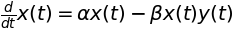

In [1]:
from sympy.interactive import printing 
printing.init_printing(use_latex=True) 
import sympy as sp
from sympy import *

t, α, β, δ, γ = sp.symbols('t α β δ γ')

prey_eq = Eq(sp.Function('x')(t).diff(t), α * sp.Function('x')(t) - β * sp.Function('x')(t) * sp.Function('y')(t))
display(prey_eq) 

answer=solve(prey_eq,sp.Function('x')(t),set=True)


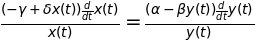

Eq(x(t), -γ*LambertW(-δ*exp((C1 - α*log(β*y(t)) + β*y(t))/γ)/γ)/δ)


In [2]:
simultaneous_eq = Eq(sp.Function('x')(t).diff(t)/sp.Function('x')(t)*(-γ+δ*sp.Function('x')(t)),sp.Function('y')(t).diff(t)/ sp.Function('y')(t) * (α-β*sp.Function('y')(t)))
display(simultaneous_eq)
answer=dsolve(simultaneous_eq,sp.Function('x')(t),set=True)
print(answer)
display(answer)

In [3]:
solve(answer)

In [4]:
print(solve(answer))

[{C1: γ*log(x(t)*exp((α*log(β*y(t)) - β*y(t) - δ*x(t))/γ))}]


In [5]:
x0, y0 = 2,2
α = 2/3
β = 4/3
γ = δ = 1

C1 = γ*log(x0*exp((α*log(β*y0) - β*y0 - δ*x0)/γ))
print (C1)

-3.31963331743224


In [16]:
#let's go independent of time and solve for x as a function of y = 10, 9, ... , 1
from scipy.special import lambertw

x0, y0 = 2,2
α = 2/3
β = 4/3
γ = δ = 1
C1 = -3.31963331743224


y_iterate=100
x_values=[]
y_values=[]
while y_iterate > .5:
    if (-γ*(lambertw(float(-δ*exp((C1 - α*log(β*y_iterate) + β*y_iterate/γ)/γ)/δ),k=0).real)) > 0:
        x_values.append(-γ*(lambertw(float(-δ*exp((C1 - α*log(β*y_iterate) + β*y_iterate/γ)/γ)/δ),k=0).real))
        y_values.append(y_iterate)
    y_iterate-=.1

    

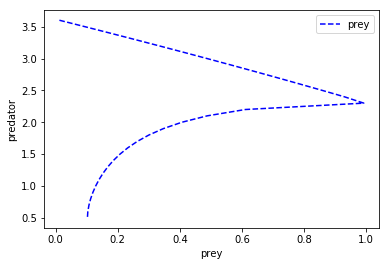

[0.012064171923671117, 0.09331171347761788, 0.17376221287044477, 0.25339897821666946, 0.33220401121951315, 0.41015777316762764, 0.4872389105134272, 0.5634239323106064, 0.6386868299029459, 0.7129986268089253, 0.7863268435444618, 0.8586348579010925, 0.9298811355713736, 0.9926091456751485, 0.610893290847239, 0.4874227028538826, 0.4063757399609201, 0.34670254897887864, 0.3002974942929273, 0.2630336827577829, 0.23248220932815547, 0.20707964720913918, 0.18575777282026215, 0.16775664386159128, 0.1525218849590794, 0.13964532009244002, 0.1288305236173112, 0.1198749623833746, 0.11266615970739498, 0.10719451214952161, 0.10359387472691883, 0.1022417890875461]


In [17]:
import matplotlib.pyplot as plt

plt.plot(x_values,y_values,'b--',label=r'prey')
plt.ylabel('predator')
plt.xlabel('prey')
plt.legend(loc='best')
plt.show()

print(x_values)

In [8]:
from scipy.special import lambertw

x0, y0 = 2,2
α = 2/3
β = 4/3
γ = δ = 1
C1 = -3.31963331743224


y_iterate=100
x_values=[]
y_values=[]
c_values=[]
while y_iterate > .5:
    if (-γ*(lambertw(float(-δ*exp((C1 - α*log(β*y_iterate) + β*y_iterate/γ)/γ)/δ),k=-1).real)) > 0:
        x_values.append(-γ*(lambertw(float(-δ*exp((C1 - α*log(β*y_iterate) + β*y_iterate/γ)/γ)/δ),k=-1).real))
        y_values.append(y_iterate)
    y_iterate-=.2


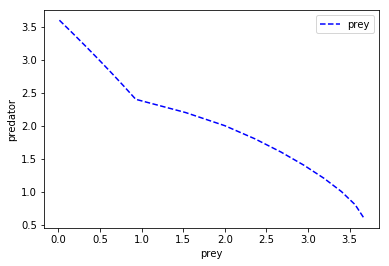

[0.012064171925539277, 0.17376221287227647, 0.3322040112213076, 0.48723891051518076, 0.6386868299046575, 0.7863268435461284, 0.9298811355729917, 1.5270906844357564, 2.0000000000017724, 2.3633660284307827, 2.6755959113784393, 2.951323102659083, 3.1943539224486144, 3.4026394806956084, 3.5679965907283457, 3.6714604851514006]


In [9]:
import matplotlib.pyplot as plt

plt.plot(x_values,y_values,'b--',label=r'prey')
plt.ylabel('predator')
plt.xlabel('prey')
plt.legend(loc='best')
plt.show()

print(x_values)

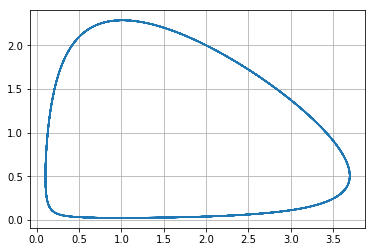

In [10]:
import matplotlib.pyplot as plt 

x0,y0 = 2,2
alpha = 2/3
beta = 4/3
gamma = delta = 1
dt=.01

x=[]
y=[]
time=[]
# x(t+∆t)=x(t)+x'(t)∆t, explicit forward difference / two term taylor series expansion
for t in range(10000):
    x0 = (alpha * x0 - beta * x0 * y0)*dt + x0  
    y0 = (gamma * x0 * y0 - gamma * y0)*dt + y0 # uses y(t+∆t)=y(t)+y'(t,x(t+∆t))∆t
    x.append(x0)
    y.append(y0)
    time.append(t*dt)
plt.plot(x, y)
plt.grid(True)

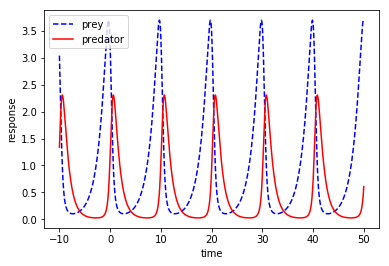

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    dxdt = α * z[0] - β * z[0] * z[1]
    dydt = δ * z[0] * z[1] - γ * z[1]
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [x0,y0]

# time points
t = np.linspace(-10,50,100000)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b--',label=r'prey')
plt.plot(t,z[:,1],'r-',label=r'predator')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()